# Scikit-learn

Going throught stuff on the [*scikit-learn* tutorials page](http://scikit-learn.org/stable/tutorial/statistical_inference/index.html).

In [125]:
import sklearn
import numpy as np
import matplotlib, matplotlib.pyplot
%matplotlib inline

## Statistical learning

In [19]:
import sklearn.datasets

In [10]:
iris = sklearn.datasets.load_iris()
iris.data.shape

(150, 4)

The shape is `(n_samples, n_features)`, in this case 150 samples and 4 features. This shape is expected.

In [11]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

[`Estimator`](http://scikit-learn.org/stable/developers/contributing.html#different-objects)s, they are the ones who do the work, and implement `fit`. Supervised estimators implement a `predict` method. Then there are `Predictor`s and `Model`s.

In [35]:
iris.keys()

dict_keys(['target_names', 'DESCR', 'feature_names', 'data', 'target'])

In [36]:
iris.data[:3], iris.target[:3]

(array([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2]]), array([0, 0, 0]))

See the targets which exist in this dataset, and their names in the `target_names` attribute of the dataset.

In [40]:
np.unique(iris.target), np.unique(iris.target_names)

(array([0, 1, 2]), array(['setosa', 'versicolor', 'virginica'], 
       dtype='<U10'))

Data split to *train* and *test* sets, as usual. The last 10 samples are the test data set here, after permuting the indices.

In [48]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test = iris.data[indices[-10:]]
iris_y_test = iris.target[indices[-10:]]

### A *k*-NN classifier

A *k* nearest neighbours (*kNN*) classifier.

In [45]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Then down to business. The prediction is

In [46]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

While the unseen, pristine gold is

In [49]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

Which ones did the Knn classifier get right?

In [50]:
knn.predict(iris_X_test) == iris_y_test

array([ True, False,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

### Linear model

In [64]:
diabetes = sklearn.datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

Find a straight line throught the data, minimizing squared residuals. $y = X\beta + \epsilon$, where $X$ is data, $y$ is the target variable, $\beta$ are coefficients and $\epsilon$ is error/observation noise.

In [65]:
import sklearn.linear_model
regr = sklearn.linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
regr.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

In [67]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898229

Calculate how well the prediction did, by comparing to the withheld gold. 1.0 would be a perfect prediction.

In [68]:
regr.score(diabetes_X_test, diabetes_y_test)

0.58507530226905691

A piece on shrinkage, sparsity and managing the [*curse of dimensionality*](http://en.wikipedia.org/wiki/Curse_of_dimensionality) by shrinking the regression coefficient, selecting only meaningful features by down-weighting them or even setting them to 0.

### Classification with logistic regression

Still regression, note, and linear at that.

$y = sigmoid(X \beta - offset) + \epsilon = \frac{1}{1 + exp(-X \beta + offset)} + \epsilon$

For multiclass classification one often fits one-versus-all classifiers, and then combines these. Below, the `C` parameter controls the amount of regularization, and `penalty="l2"` and `penalty="l1'` give *shrinkage* and *sparsity*.

In [88]:
logistic = sklearn.linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Regression and classification with Support Vector Machines

SVMs try to find a combination of samples to build a plane which maximizes the margin between two classes. Regularization with parameter `C`, larger value means less regularization and observations close to the separating plane are used.

SVMs can do both classification *SVC* or regression *SVR* (oh?)

In [89]:
import sklearn.svm
svc = sklearn.svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Kernels include the straight linear kernel, the wobbly polynomial `poly`, and blobby Radial Basis Function `rbf`.

### Model selection: choosing estimators and their parameters

Every estimator exposes a `score` method for measuring quality of fit.

In [94]:
digits = sklearn.datasets.load_digits()

svc = sklearn.svm.SVC(C=1, kernel='linear')
svc.fit(digits.data[:-100], digits.target[:-100]).score(digits.data[-100:], digits.target[-100:])

0.97999999999999998

To get a better measure, we can do *k-folds* cross-validation. Sklean provides cross-validation generators such as `sklearn.cross_validation.KFold`. A helper function `sklearn.cross_validation.cross_val_score` helps, by taking as arguments an estimator, train data and labels, number of folds).

The available cross-validation generators are `KFolds`, `StratifiedKFold`, `LeaveOneOut` and `LeaveOneLabelOut`. Nice ʕ•ᴥ•ʔ

Grid-search chooses parameters of a given estimator such that the cross-validation score is maximized. By default it uses a stratified 3-fold.

In [105]:
import sklearn.grid_search
Cs = np.logspace(-6, -1, 10)
clf = sklearn.grid_search.GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(digits.data[:1000], digits.target[:1000])
print("Best score {},".format(clf.best_score_), "best estimator C {}".format(round(clf.best_estimator_.C, 4)))

Best score 0.925, best estimator C 0.0077


More efficient classification can be done on algorighm-by-algorithm basis, f.ex. `Lasso` with `LassoCV`. In general, 'CV' is appended to estimator names.

### Unsupervised learning

> Seeking representations of the data

Well said. Clustering in general can be seen as a way to choose a small number of exemplars to compress the information; the problem is sometimes known as *vector quantization*.

First with *k*-means.

In [106]:
import sklearn.cluster
k_means = sklearn.cluster.KMeans(n_clusters=3)
k_means.fit(iris.data)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [108]:
print(k_means.labels_ == iris.target)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False  True False
 False False False False False  True  True False False False False  True
 False  True False  True False False  True  True False False False False
 False  True False False False False  True False False False  True False
 False False  True False False  True]


Discovering ground truth is hard; firstly, how many *k*, and secondly the algorithms is sensitive to initialization, and can fall to local minima.

Hierarchical agglomerative clustering with Ward. A bottom-up approach to minimize a *linkage* criterion, and this approach is particularly interesting when there are only a few observations per cluster. The alternative is divisive top-down approach.

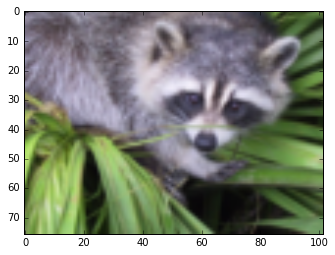

In [128]:
import sklearn.feature_extraction.image
import scipy

#matplotlib.pyplot.gray()
face = scipy.misc.imresize(scipy.misc.face(), 0.10) / 255
matplotlib.pyplot.imshow(face)

Some estimators expose a `transform` method, for instance for dimension reduction of the dataset.

### Decomposition

From signal to components and loadings, ie. we want to rewrite our multivariate data $X$ on a different observational basis; learn loadings $L$ and a set of components $C$ such that $X = LC$. Different criteria for choosing the components exists.

One is *Principal component analysis* (PCA), which select successive components that explain the maximum of variance in the signal. E.g. the data is very flat in one direction and that one of three univariate features can be almost exactly computed using the other two. PCA finds directions where the data is not flat. When used for transformation, PCA can reduce dimensionality by projecting on a principal subspace.

In [132]:
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

In [135]:
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(X)
print("Explained variance {}".format(pca.explained_variance_))

Explained variance [  3.47649034e+00   1.04633334e+00   1.54878496e-32]


As we can see, only two first components are useful. Make a decision to reduce the dimensions to two.

In [139]:
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

*Independent components analysis* (ICA) selects components so that the distribuion of their loadings carries a maximum amount of independent information. It is able to recover non-Gaussian independent signals.

Let's observe a timeline with three mixed signals of a sine and square signals, and noise.

In [141]:
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time) # signal 1: sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # signal 2: square signal
S = np.c_[s1, s2]
S += 0.2 * np.random.normal(size=S.shape) # add noise
S /= S.std(axis=0) # standardize data
# mix data
A = np.array([[1, 1], [0.5, 2]]) # mixing matrix
X = np.dot(S, A.T) # generate observations

Compute ICA

In [144]:
ica = sklearn.decomposition.FastICA()
S_ = ica.fit_transform(X)
A_ = ica.mixing_.T
np.allclose(X, np.dot(S_, A_) + ica.mean_)

True

### Pipelining

Putting it all together.

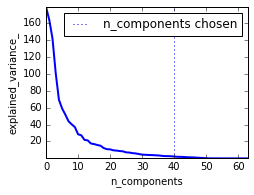

In [151]:
import sklearn.pipeline

# Setup
logistic = sklearn.linear_model.LogisticRegression()
pca = sklearn.decomposition.PCA()
pipe = sklearn.pipeline.Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# Plot the PCA spectrum
pca.fit(digits.data)

matplotlib.pyplot.figure(1, figsize=(4, 3))
matplotlib.pyplot.clf()
matplotlib.pyplot.axes([.2, .2, .7, .7])
matplotlib.pyplot.plot(pca.explained_variance_, linewidth=2)
matplotlib.pyplot.axis('tight')
matplotlib.pyplot.xlabel('n_components')
matplotlib.pyplot.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)
# pipeline parameters are set by using __ as a separator, eh...
estimator = sklearn.grid_search.GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(digits.data, digits.target)

matplotlib.pyplot.axvline(estimator.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
matplotlib.pyplot.legend(prop=dict(size=12))